C:\Users\Admin\.conda\envs\CV\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 136s 1us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_________________________

Found 819 images belonging to 2 classes.
Epoch 1/5
26/26 [==============================] - 360s 14s/step - loss: 1.7784 - accuracy: 0.8392 - val_loss: 1.7240 - val_accuracy: 0.5873
Epoch 2/5
26/26 [==============================] - 387s 15s/step - loss: 1.4508 - accuracy: 0.9057 - val_loss: 2.0978 - val_accuracy: 0.4249
Epoch 3/5
26/26 [==============================] - 484s 19s/step - loss: 0.8356 - accuracy: 0.9371 - val_loss: 1.7373 - val_accuracy: 0.4420
Epoch 4/5
26/26 [==============================] - 385s 15s/step - loss: 0.6709 - accuracy: 0.9637 - val_loss: 4.9209 - val_accuracy: 0.4127
Epoch 5/5
26/26 [==============================] - 415s 16s/step - loss: 0.4899 - accuracy: 0.9661 - val_loss: 1.0982 - val_accuracy: 0.5824


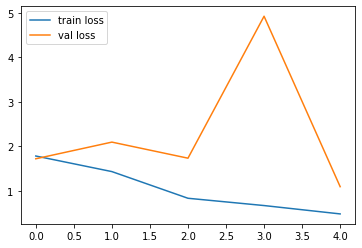

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'data/train'
valid_path = 'data/validation'

# add preprocessing layer to the front of VGG
#vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('data/train/*')
  

# our layers - you can add more if you want
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('data/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')

In [5]:
test_data = pd.read_csv("test.csv")
for row in test_data.iterrows():
    img = (row[1][0])
    #print(img)
    #img_pred = image.load_img('596.jpg',target_size=(224,224))
    img_pred = image.load_img(img,target_size=(224,224))

    img_pred = image.img_to_array(img_pred)
    img_pred = np.expand_dims(img_pred, axis=0)

    result = model.predict(img_pred)

    #print(result[0][0])
    
    
    if(int(result[0][0]) == 1):
        print(1)
    else:
        print(0)

0
1
0
1
0
1
0
1
0
1
0
0
0
0
0
1
0
1
1
1
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
1
1
0
0
1
0
0
0
0
0
1
1
0
0
1
0
1
1
0
0
1
1
0
0
1
0
1
0
0
0
0
0
1
0
1
0
0
1
1
1
0
1
1
0
0
0
0
1
1
1
0
1
0
1
0
1
1
0
0
1
1
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
0
1
0
0
0
0
0
1
0
0
0
1
1
1
0
0
1
1
1
0
1
0
1
0
0
0
1
1
1
0
1
0
0
1
0
1
0
0
1
1
1
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
1
0
0
0
1
1
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
1
1
0
1
0
1
0
0
0
0
1
1
0
0
1
1
0
0
0
0
0
1
1
0
1
0
1
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
1
0
1
0
0
0
0
1
1
0
1
1
0
0
1
1
0
1
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
1
0
0
1
0
1
1
0
1
0
1
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
1
1
0
1
1
1
1
0
0
0
1
1
1
1
0
0
1
1
0
0
0
0
0
1
0
1
1
0
1
1
0
1
0
1
0
0
0
0
0
0
1
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
1
1
0
1
0
0
1
0
0
1
1
1
0
0
1
0
0
0
1
0
1
1
0
1
0
0
0
1
1
0
1
0
0
1
0
1
1
0
0
0
1
1
0
1
1
0
0
1
1
0
0
0
1
0
1
1
0
1
0
0
0
1
0
0
1
0
0
0
0
0
1
1
1
1
1
0
1
0
0
0
0
1
1
0
1
0
0
0
1
1
1
1
1
0
1
1
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
